### Face Detection and Gender Classification
#### Team members:
Xingchi Dai: dai01@g.harvard.edu

Jeewon Hwang: jeewonHwang@g.harvard.edu

Xiaowen Chang: xiaowenchang@g.harvard.edu

Zelong Qiu: zqiu01@g.harvard.edu

#### Assigned Teaching fellow: 

Yingzhuo (Diana) Zhang

###### Submitted as the final project of CS 109: Data Science in Harvard University

# Table of Contents

* [0. Introduction](#0.-Introduction)
* [1. Face Detection](#1.-Face-Detection)
* [2. Gender Classification](#2.-Gender-Classification)
    * [2.1 Data Cleaning](#2.1-Data-Cleaning)
        * [2.1.1 Read Data](#2.1.1-Read-Data)
        * [2.1.2 Image Flattening](#2.1.2-Image-Flattening)
    * [2.2 Principal Components Analysis](#2.2-Principal-Components-Analysis)
        * [2.2.1 Principal Components Extraction](#2.2.1-Principal-Components-Extraction)
        * [2.2.2 Visualize Data with 2 Principal Components](#2.2.2-Visualize-Data-with-2-Principal-Components)
    * [2.3 Baseline Models](#2.3-Baseline-Models)
    * [2.4 K Nearest Neighbors](#2.4-K-Nearest-Neighbors)
        * [2.4.1 Visualize Data with 2 Principal Components](#2.4.1-Visualize-Data-with-2-Principal-Components)
        * [2.4.2 Train Classifier with 8 Principal Components](#2.4.2-Train-Classifier-with-8-Principal-Components)
    * [2.5 Support Vector Machine](#2.5-Support-Vector-Machine)
        * [2.5.1 Visualize Data with 2 Principal Components](#2.5.1-Visualize-Data-with-2-Principal-Components)
        * [2.5.2 Train Classifier with 8 Principal Components](#2.5.2-Train-Classifier-with-8-Principal-Components)
    * [2.6 Logistic Regression](#2.6-Logistic-Regression)
        * [2.6.1 Visualize Data with 2 Principal Components](#2.6.1-Visualize-Data-with-2-Principal-Components)
        * [2.6.2 Train Classifier with 8 Principal Components](#2.6.2-Train-Classifier-with-8-Principal-Components)  
* [3. ROC Curve](#3.-ROC-Curve)
    * [3.1 ROC Curve for KNN](#3.1-ROC-Curve-for-KNN)
    * [3.2 ROC Curve for SVM](#3.2-ROC-Curve-for-SVM)
    * [3.3 ROC Curve for Logistic Regression](#3.3-ROC-Curve-for-Logistic-Regression)
    * [3.4 Model Comparison](#3.4-Model-Comparison)
* [4. Application](#4.-Application)
    * [4.1 Face Detection](#4.1-Face-Detection)
    * [4.2 Gender Classification](#4.2-Gender-Classification)

# 0. Introduction
### Background and Motivation
Face recognition has become one of the most popular research areas, as faces’ expressions contain much information neuroscientists and psychologists are interested in. It is also one of the most successful applications of computer vision and machine learning researches. As such, the team is motivated to use what CS109 has taught, such as PCA, KNN, SVN, etc. in the class to implement a simple, yet practical, face detection and recognition project. 
The expected background researches for this project covers advanced classification algorithms and some tools to evaluate/estimate performance, such as  Principal-Component-Analysis (PCA), K-Nearest-Neighbors (KNN) and Linear-Support-Vector-Machine (Linear SVM), Confusion Matrix and ROC curve.

### Project Objectives 
The goal of this project is to finish a classification algorithm to detect and distinguish objects(faces) in images. During the project, the team members will consolidate the knowledge given in classes and integrate them to deliver a completed, working, interesting project. The project itself is not a breakthrough technological achievement, yet it is an opportunity for team members to review, learn and think. 

### Feature:
1: Face detection: detect the face in a photo.

2: Face recognition/classification: classify the gender of the detected face.

### Design Overview 
1: Face detection: The OpenCV(Open Source Computer Vision) module would be used to detect the face.

2: Face recognition:  PCA(Principal Component Analysis) would be used to reduce the dimension. KNN(K-Nearest-Neighbors),  SVM(Support Vector Machines) and Logistic Regression would be used to do the gender classification.

3: Parameterization: k-fold cross-validation approach would be applied to avoid over-fitting scenario.

4:Model assessment: AUROC (area under ROC curve) will be used to evaluate the accuracy of results and the performance of algorithms. 

### Verification 
Train/Test data: data will be divided into the train dataset and the test dataset. The train dataset would be used to develop the algorithm and the test dataset would be used to evaluate the performance of the algorithm. 

### Non-standard Library Used
CV2, glob, PIL, sklearn, panda, matplotlib, seaborn

We used haarcascade_frontalface_default.xml to detect the face.


# 1. Face Detection

In [6]:
import cv2
import sys
import numpy as np
import glob
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

Found 2 faces!


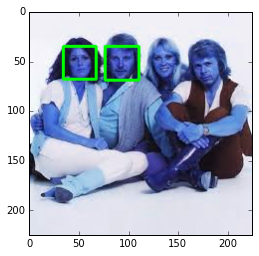

In [9]:
#read the image
imagePath = 'abba.jpeg'

# Create the haar cascade
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the image
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.cv.CV_HAAR_SCALE_IMAGE
)

print "Found {0} faces!".format(len(faces))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

imshow(image)

In [10]:
faces

array([[34, 35, 33, 33],
       [76, 35, 34, 34]], dtype=int32)

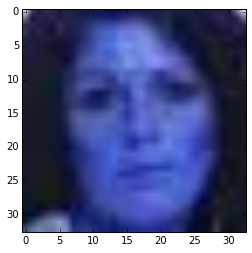

In [12]:
# we've got a women's face
image = cv2.imread(imagePath)
imshow(image[faces[0][1]:faces[0][1]+faces[0][3],faces[0][0]:faces[0][0]+faces[0][2]]) #y first, x second

# 2. Gender Classification

## 2.1 Data Cleaning

## 2.1.1 Read Data
#### Get Face Images
get face images

In [15]:
img_path = 'nottingham_database'

images = glob.glob(img_path+'/*')

img_dict={}
dim = (275, 350)
for img_p in images:    
#     print img_p
    k = img_p[img_p.find('database/',)+9:-4]
    gif = cv2.VideoCapture(img_p)
    ret, frame = gif.read()
    img = Image.fromarray(frame)
    img = np.array(img.convert('RGB'))
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    img_dict[k] = [img, k[0]]    # img_dict = {"m044": [image_array, 'm'], ...}

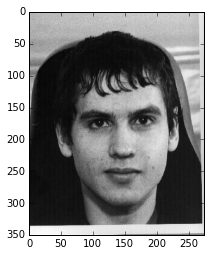

In [16]:
imshow(img_dict['m044'][0])

## 2.1.2 Image Flattening

#### Flatten all the images so that a row represents a image and column represents each r, g, b value of each pixel

In [17]:
# change every pixel to be columns (to be used in lab 5)

def flatten_rgb_as_column(picture):
    picture_rgb = []
    for row in picture: # iterate row
        for pixel in row: # iterate 400 pixels to make column
            for rgb in pixel: # iterate 3 rgb colors
                picture_rgb.append(rgb)
    return picture_rgb


In [18]:
flattened_rgb = []
label = []

for k in img_dict.keys():
    label.append(img_dict[k][1])
    flattened_rgb.append(flatten_rgb_as_column(img_dict[k][0]))

In [19]:
data = np.array([np.array(xi) for xi in flattened_rgb])
y = np.array(label)

In [20]:
# data
# len(data[0])
data.shape # (412, 288750) means we have the same length for each row

(100, 288750)

In [21]:
y

array(['m', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'f', 'f', 'f', 'f', 'm',
       'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'f',
       'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'f',
       'f', 'm', 'm', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'f', 'f', 'f',
       'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm',
       'm', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm',
       'm', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm',
       'm', 'm', 'f', 'f', 'f', 'f', 'f', 'm', 'm'], 
      dtype='|S1')

## 2.2 Principal Components Analysis

## 2.2.1 Principal Components Extraction

In [24]:
from sklearn.decomposition import PCA

In [164]:
pca = PCA(n_components=10)
X = pca.fit_transform(data)

In [165]:
print pca.explained_variance_ratio_.sum()

0.587808753625


In [166]:
pca.explained_variance_ratio_*100

array([ 11.25731162,  10.49699853,   7.31984524,   6.41859934,
         6.05004375,   4.77452205,   3.73004001,   3.59704559,
         2.65582266,   2.48064657])

In [167]:
dim_x, dim_y = (275, 350)
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=dim_x*dim_y*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((dim_x, dim_y,3), 'uint8')
    rgbArray[..., 0] = r.reshape(dim_x, dim_y)
    rgbArray[..., 1] = g.reshape(dim_x, dim_y)
    rgbArray[..., 2] = b.reshape(dim_x, dim_y)
    imshow(rgbArray)

In [168]:
STANDARD_SIZE = (dim_x, dim_y)#standardized pixels in image.

In [169]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
#     print r, g, b
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
#     print rgbArray
    return rgbArray

def display_image(mat):
    imshow(get_image(mat))

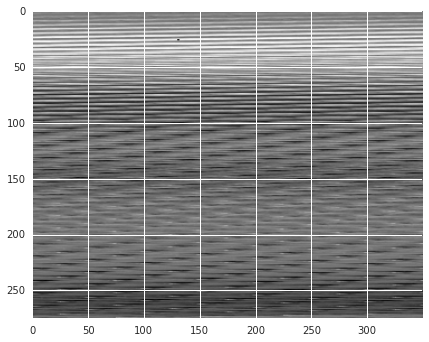

In [170]:
display_component(pca,0)

In [173]:
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [174]:
df = pd.DataFrame({"y":y=='m', "label":np.where(y=='m', "male", "female")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

,label,y,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,male,True,-4133.839827,-11830.288739,-5088.131891,20318.048958,-6644.824015,760.244925,-19383.739721,7249.047624,-5044.024664,9293.799081
1,male,True,2106.089820,2848.363572,12838.382808,1180.270680,-1795.668147,-8941.100613,-1487.575586,-2925.760934,2920.197161,1002.189200
2,male,True,-9026.913710,5395.432649,3901.180420,916.178818,10945.652926,3417.987955,449.252882,-1652.151079,8843.434719,-693.935246
3,male,True,-7205.017290,-970.803629,5112.217695,10414.075991,-5042.572106,-2466.122523,-8065.392153,6028.155963,-10677.397977,385.136241
4,male,True,11008.291355,-5499.061114,-11742.266524,16804.028531,-7404.677503,4559.958263,-4339.696027,183.790933,-400.465967,1779.519563


In [187]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)

In [189]:
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

## 2.2.2 Visualize Data with 2 Principal Components

In [175]:
import seaborn as sns
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

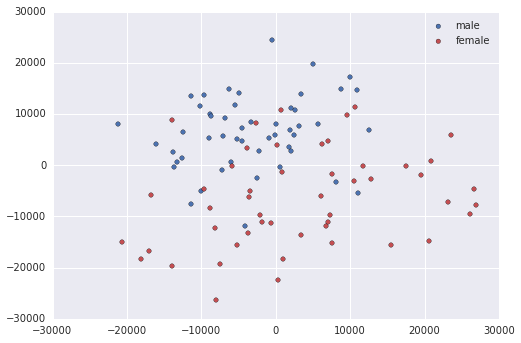

In [176]:
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()

From the plot above, we could see that female and male can be classified even with only two principal components.

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

#### Pre-defined Helper Functions

In [178]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [179]:
from sklearn.grid_search import GridSearchCV

In [180]:
def cv_optimize(clf, parameters, x, y, n_folds, score_func):
    fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    fitmodel.fit(x, y)
    return fitmodel.best_estimator_

In [181]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

## 2.3 Baseline Models

Our baseline_model_1 would be classify all faces as males.

Our baseline_model_2 would be classify all faces as not females.

Our classifier should at least beat these two.

In [182]:
# Accuracy of baseline_model_1 (classifiy all faces males)
bsl_accuracy = sum([i=='m' for i in y])/float(len(y))
print "bs1_accuracy:", bsl_accuracy 

bs1_accuracy: 0.5


In [183]:
# Accuracy of baseline_model_1 (classifiy all faces males)
bsl_accuracy = sum([i=='f' for i in y])/float(len(y))
print "bs1_accuracy:", bsl_accuracy 

bs1_accuracy: 0.5


## 2.4 K Nearest Neighbors

In [184]:
from sklearn.neighbors import KNeighborsClassifier

## 2.4.1 Visualize Data with 2 Principal Components

In [251]:
pc_name = [i for i in df.columns[2:4]]

In [252]:
clf_knn, Xtrain_k, ytrain_k, Xtest_k, ytest_k = do_classify(KNeighborsClassifier(), 
                                                            {"n_neighbors": range(1,40,2)}, 
                                                            df,pc_name, 'label', 'male', mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.80
[[13  3]
 [ 3 11]]
########################################################


/Users/xwlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


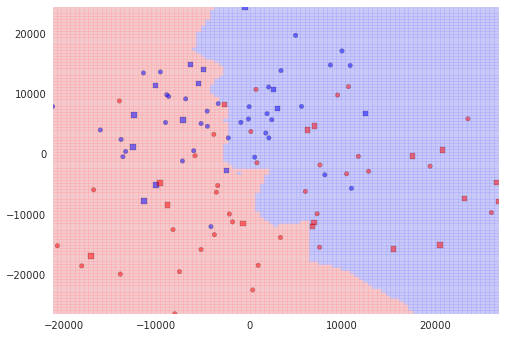

In [253]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain_k, Xtest_k, ytrain_k, ytest_k, cv_knn, alpha=0.5, psize=20);

## 2.4.2 Train Classifier with 8 Principal Components

In [254]:
pc_name = [i for i in df.columns[2:10]]

In [255]:
clf_knn_8, Xtrain_k_8, ytrain_k_8, Xtest_k_8, ytest_k_8 = do_classify(KNeighborsClassifier(), 
                                                                      {"n_neighbors": range(1,40,2)}, 
                                                                      df,pc_name, 'label', 'male', mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.87
Accuracy on test data:     0.87
[[12  4]
 [ 0 14]]
########################################################


/Users/xwlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Model with 8 principal components has higher accuracy.

## 2.5 Support Vector Machine

In [256]:
from sklearn.svm import LinearSVC

## 2.5.1 Visualize Data with 2 Principal Components

In [372]:
pc_name = [i for i in df.columns[2:4]]

In [373]:
clfsvm, Xtrain_svm, ytrain_svm, Xtest_svm, ytest_svm = do_classify(LinearSVC(loss="hinge"), 
                                                                   {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},  
                                                                   df,pc_name, 'label', 'male', mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.83
Accuracy on test data:     0.77
[[12  4]
 [ 3 11]]
########################################################


/Users/xwlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


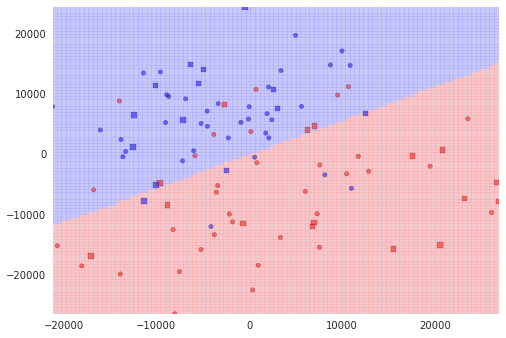

In [374]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain_svm, Xtest_svm, ytrain_svm, ytest_svm, clfsvm, alpha=0.5, psize=20);

## 2.5.2 Train Classifier with 8 Principal Components

In [375]:
pc_name = [i for i in df.columns[2:10]]

In [376]:
clfsvm_8, Xtrain_svm_8, ytrain_svm_8, Xtest_svm_8, ytest_svm_8 = do_classify(LinearSVC(loss="hinge"), 
                                                                   {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},  
                                                                   df,pc_name, 'label', 'male', mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.87
Accuracy on test data:     0.80
[[12  4]
 [ 2 12]]
########################################################


/Users/xwlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


# 2.6 Logistic Regression

In [262]:
from sklearn.linear_model import LogisticRegression

## 2.6.1 Visualize Data with 2 Principal Components

In [263]:
pc_name = [i for i in df.columns[2:4]]

In [264]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), 
                                                           {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                                                           df,pc_name, 'label', 'male', mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.83
Accuracy on test data:     0.80
[[13  3]
 [ 3 11]]
########################################################


/Users/xwlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


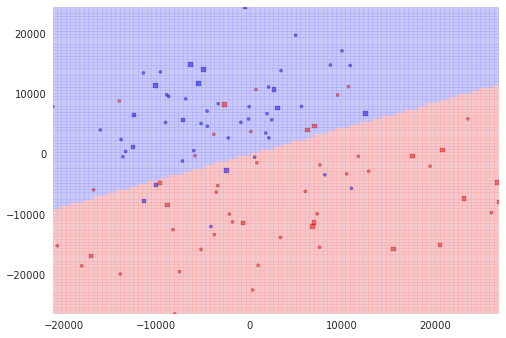

In [265]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, alpha=0.5);

## 2.6.2 Train Classifier with 8 Principal Components

In [266]:
pc_name = [i for i in df.columns[2:10]]

In [267]:
clf_l_8, Xtrain_l_8, ytrain_l_8, Xtest_l_8, ytest_l_8  = do_classify(LogisticRegression(),
                                                                     {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                                                                     df,pc_name, 'label', 'male', mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.94
Accuracy on test data:     0.90
[[14  2]
 [ 1 13]]
########################################################


/Users/xwlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


# 3. ROC Curve

In [154]:
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

## 3.1 ROC Curve for KNN

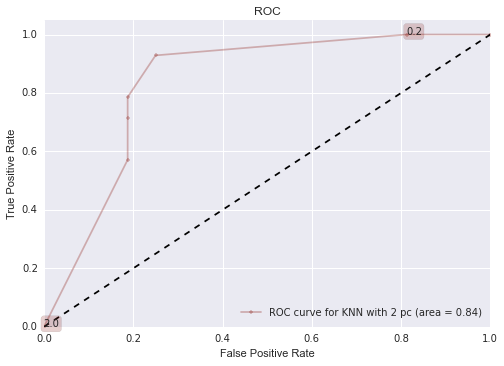

In [268]:
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("KNN with 2 pc",clf_knn, ytest_k, Xtest_k)

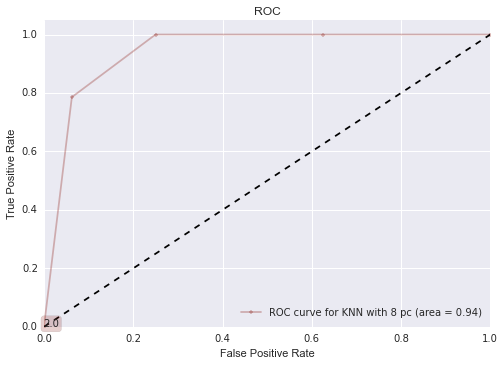

In [269]:
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("KNN with 8 pc",clf_knn_8, ytest_k_8, Xtest_k_8)

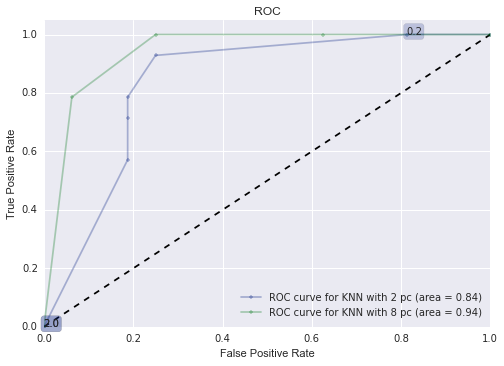

In [270]:
with sns.color_palette("dark"):
    ax=make_roc("KNN with 2 pc",clf_knn, ytest_k, Xtest_k)
    make_roc("KNN with 8 pc",clf_knn_8, ytest_k_8, Xtest_k_8, ax)

KNN model with 8 pc performs better than that with 2 pc. We will use KNN model with 8 pc for our future model comparison.

## 3.2 ROC Curve for SVM

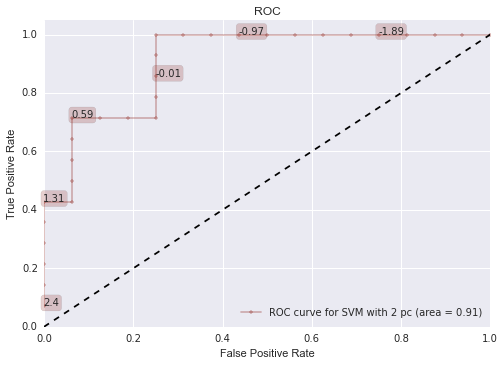

In [377]:
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("SVM with 2 pc", clfsvm, ytest_svm, Xtest_svm, proba=False)

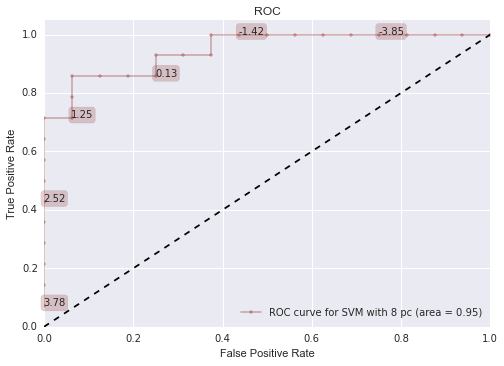

In [378]:
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("SVM with 8 pc", clfsvm_8, ytest_svm_8, Xtest_svm_8, proba=False)

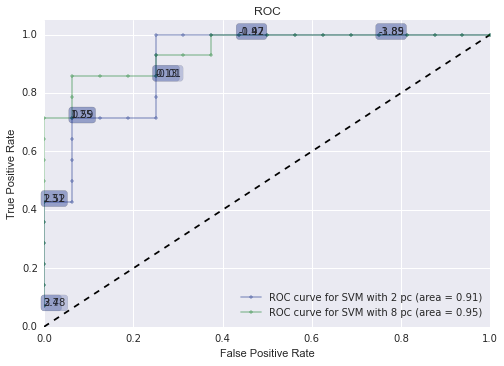

In [379]:
with sns.color_palette("dark"):
    ax=make_roc("SVM with 2 pc", clfsvm, ytest_svm, Xtest_svm, proba=False)
    make_roc("SVM with 8 pc", clfsvm_8, ytest_svm_8, Xtest_svm_8, ax, proba=False)

SVM model with 8 pc performs better that with 2 pc. 

## 3.3 ROC Curve for Logistic Regression

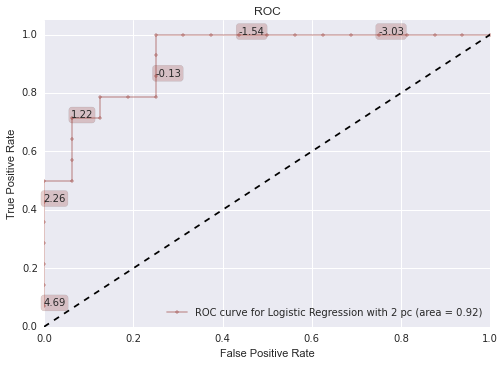

In [274]:
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("Logistic Regression with 2 pc", clf_l, ytest_l, Xtest_l, proba=False)

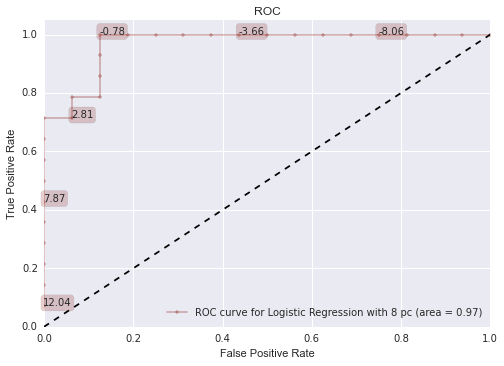

In [275]:
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("Logistic Regression with 8 pc", clf_l_8, ytest_l_8, Xtest_l_8, proba=False)

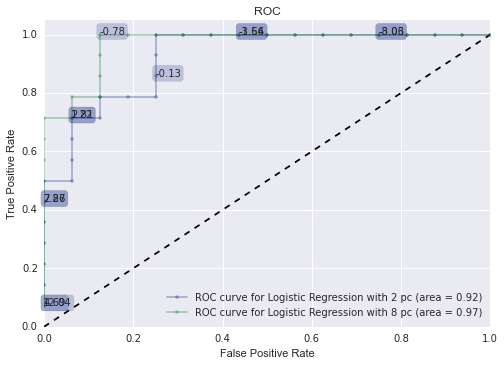

In [277]:
with sns.color_palette("dark"):
    ax=make_roc("Logistic Regression with 2 pc", clf_l, ytest_l, Xtest_l, proba=False)
    make_roc("Logistic Regression with 8 pc", clf_l_8, ytest_l_8, Xtest_l_8, ax, proba=False)

Logistic Regression model with 8 pc performs better than that with 2 pc. We will use Logistic Regression model with 8 pc for our future model comparison.

## 3.4 Model Comparison

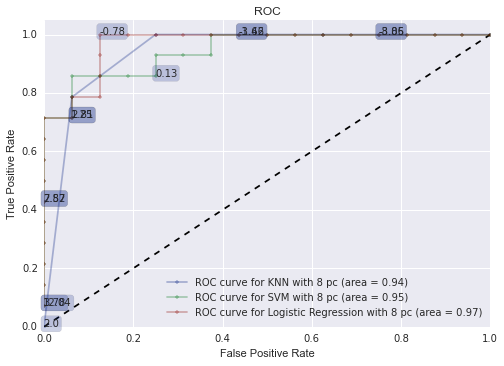

In [380]:
with sns.color_palette("dark"):
    ax=make_roc("KNN with 8 pc",clf_knn_8, ytest_k_8, Xtest_k_8)
    ax=make_roc("SVM with 8 pc", clfsvm_8, ytest_svm_8, Xtest_svm_8, ax, proba=False)
    make_roc("Logistic Regression with 8 pc", clf_l_8, ytest_l_8, Xtest_l_8, ax, proba=False)

These three models' performance are very similar to each other. 

Among them, Logistic Regression with 8 pc performs the best, SVM with 8 pc performs second best, KNN with 8 pc performs last.

So we chose Logistic Regression with 8 pc as our final model.

# 4. Application

## 4.1 Face Detection 

In [346]:
#read the image
application_imagePath = 'application.jpg'

# Create the haar cascade
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read in the image
application_image = cv2.imread(application_imagePath)
gray = cv2.cvtColor(application_image, cv2.COLOR_BGR2GRAY)

In [347]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.cv.CV_HAAR_SCALE_IMAGE
)

print "Found {0} faces!".format(len(faces))

Found 4 faces!


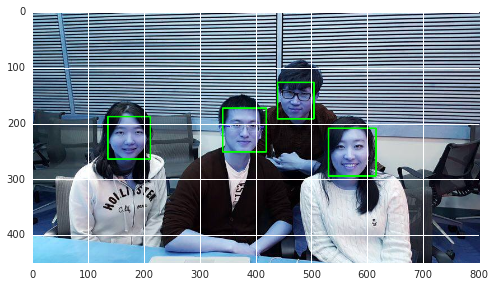

In [348]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(application_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

imshow(application_image)


In [349]:
################################################
# Take out Faces
application_face_image = []
for i in range(len(faces)):
    application_face_image.append(application_image[faces[i][1]:faces[i][1]+faces[i][3], faces[i][0]:faces[i][0]+faces[i][2]])
 

0th face!


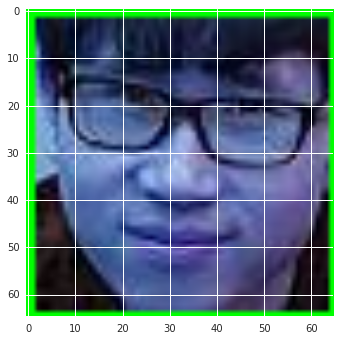

In [350]:
print "{0}th face!".format(0)
imshow(application_face_image[0])

1th face!


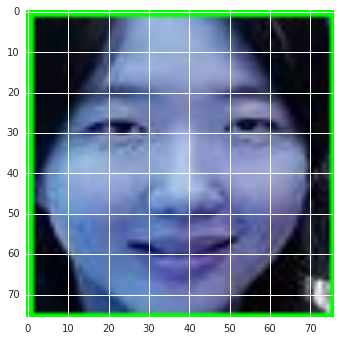

In [351]:
print "{0}th face!".format(1)
imshow(application_face_image[1])

2th face!


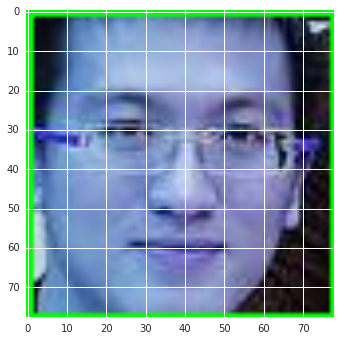

In [352]:
print "{0}th face!".format(2)
imshow(application_face_image[2])

3th face!


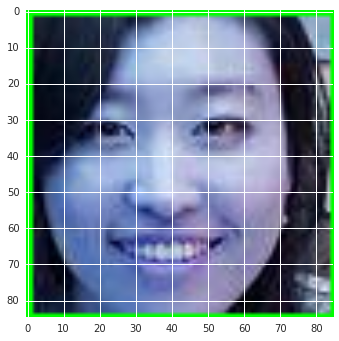

In [354]:
print "{0}th face!".format(3)
imshow(application_face_image[3])

In [355]:
for i in range(len(application_face_image)):    
    img = cv2.resize(application_face_image[i], dim, interpolation=cv2.INTER_AREA)
    application_face_image[i] = img

In [356]:
#############################################
# flatten face images
flattened_application_faces = []
for face in application_face_image:
    flattened_application_faces.append(flatten_rgb_as_column(face))
    
application_data = np.array([np.array(xi) for xi in flattened_application_faces])

In [357]:
len(application_data[0])

288750

## 4.2 Gender Classification

### PCA transformation

In [392]:
#############################################
# 4. PCA transform (NOT fit_transform!!!!)
pca_applied_application_X = pca.transform(application_data) #application_data was shape of (n_samples, n_features)
# pca will return array in shape of (n_samples, n_components)

# ############################################
# # 5. dataframe
application_df = pd.DataFrame({})
# # # take only 2 pc 
for i in range(10):
    application_df["pc%i" % (i+1)] = pca_applied_application_X[:,i]

### Predict using Logistic Regression model with 8 pc

In [393]:
pc_name = [i for i in df.columns[2:10]]
X_application = application_df[pc_name]
application_y_pred = clf_l_8.predict(X_application)

In [394]:
application_y_pred

array([1, 1, 1, 1])

1 incidates "Male" and 0 incates "Female". In this case, we only have 50% accuracy.

### predict using SVM model with 8 pc

In [397]:
pc_name = [i for i in df.columns[2:10]]
X_application = application_df[pc_name]
application_y_pred = clfsvm_8.predict(X_application)

In [398]:
application_y_pred

array([1, 1, 1, 0])

1 incidates "Male" and 0 incates "Female". In this case, we only have 75% accuracy.

In this example, SVM model with 8 pc perform better than Logistic Regression model with 8pc. Although the classifier we trained didn't give us a very high accuracy in real application, it still did a very good job. 

For further study, to improve the classifier, we could use larger data set and try some deep machine learning algorithms.